In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached grpcio-1.70.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")


In [43]:
# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

In [49]:
# Display basic dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [51]:
# Display first few rows
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [53]:
# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())

# Encode the target column 'letter' into numerical values
label_encoder = LabelEncoder()
data['letter'] = label_encoder.fit_transform(data['letter'])  # Converts A, B, C... into 0, 1, 2...

# Splitting features and target variable
X = data.drop(columns=['letter'])  # Drop target column
y = data['letter']  # Target variable

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Missing values in dataset:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [57]:
# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(len(np.unique(y)), activation='softmax')  # Output layer (softmax for multi-class classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Train the ANN model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.0822 - val_accuracy: 0.9515 - val_loss: 0.1604
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9755 - loss: 0.0793 - val_accuracy: 0.9495 - val_loss: 0.1640
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9735 - loss: 0.0814 - val_accuracy: 0.9510 - val_loss: 0.1533
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9766 - loss: 0.0766 - val_accuracy: 0.9473 - val_loss: 0.1530
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9750 - loss: 0.0805 - val_accuracy: 0.9482 - val_loss: 0.1559
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9772 - loss: 0.0727 - val_accuracy: 0.9450 - val_loss: 0.1747
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.0745 - val_accuracy: 0.9430 - val_loss: 0.1664
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.0741 - val_accuracy: 0.

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.94      0.89      0.91       153
           2       0.98      0.98      0.98       147
           3       0.90      0.96      0.93       161
           4       0.91      0.96      0.93       154
           5       0.97      0.92      0.94       155
           6       0.96      0.92      0.94       155
           7       0.89      0.93      0.91       147
           8       0.94      0.93      0.93       151
           9       0.90      0.93      0.92       149
          10       0.94      0.94      0.94       148
          11       0.98      0.97      0.97       152
          12       0.97      0.94      0.96       158
          13       0.97      0.90      0.93       157
          14       0.97      0.95      0.96       150
          15       0.96      0.97      0.97     

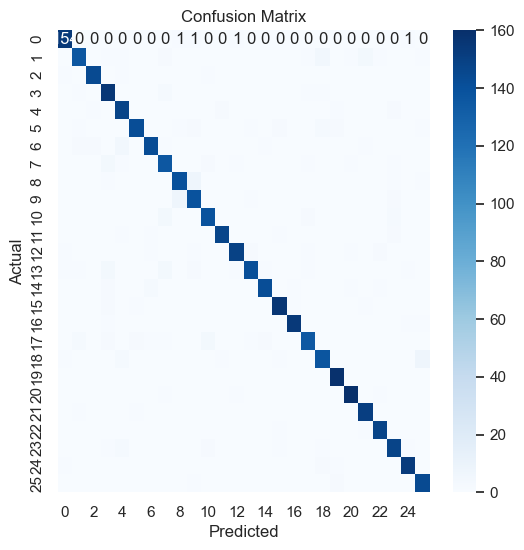

In [62]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Model Accuracy: {accuracy:.4f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix visualization
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [65]:
# Experimenting with different hyperparameters
def create_model(learning_rate=0.001, neurons=64):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(neurons // 2, activation='relu'),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Trying different hyperparameters
learning_rates = [0.01, 0.001, 0.0001]
neurons_list = [32, 64, 128]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for neurons in neurons_list:
        print(f"Training model with learning_rate={lr} and neurons={neurons}")
        model = create_model(learning_rate=lr, neurons=neurons)
        history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_test, y_pred_classes)
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {"learning_rate": lr, "neurons": neurons}

print("\nBest Hyperparameters:", best_params)
print(f"Best Accuracy Achieved: {best_accuracy:.4f}")


Training model with learning_rate=0.01 and neurons=32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.01 and neurons=64
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.01 and neurons=128
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.001 and neurons=32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.001 and neurons=64
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.001 and neurons=128
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.0001 and neurons=32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with learning_rate=0.0001 and neurons=64
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with learning_rate=0.0001 and neurons=128
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Best Hyperparameters: {'learning_rate': 0.001, 'neurons': 128}
Best Accuracy Achieved: 0.9603
